In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField as GASF
import math
import shutil


In [2]:
import os

In [3]:
os.getcwd()

'/home/ubuntu/time_series_to_image/pupil_ADHD'

%matplotlib inline

In [21]:
path = os.path.abspath('')

In [22]:
if not os.path.exists('GASF_viridis'):
    os.makedirs('GASF_viridis')

In [23]:
root = "Pupil_Z_csvfiles_interpol_slicedfac100/"

In [24]:
fileslist = sorted(os.listdir(root))
len(fileslist)

9804

In [25]:
destination = 'GASF_viridis/'

In [26]:
failed = 0

In [27]:
for i in range(len(fileslist)):
#for i in range(3):
    try:
        stem = fileslist[i]
        filename = root + stem
        pupil_time_series_check = np.genfromtxt(filename, delimiter=',')

        absolutemin = -3
        maxraise = 6
        series_scaled = []
        for elem in pupil_time_series_check:
            elem_scaled = -1+max(2*(elem-absolutemin)/maxraise,0)
            series_scaled.append(min(elem_scaled,1))

        series_scaled = np.array(series_scaled)
        series_scaled = series_scaled.reshape(1,-1)



        # GAF transformations
        image_size = 80
        gasf = GASF(image_size, sample_range=None)
        X_gasf = gasf.fit_transform(series_scaled)
        #X_gasf = gasf.fit_transform(series_joke)



        # Show the results for the first time series
        plt.figure(figsize=(8, 8))
        #plt.subplot(121)
        plt.imshow(X_gasf[0], cmap='rainbow', origin='lower')
        #plt.title("GASF", fontsize=16)

        strFile = destination +stem.split('.')[0]+".jpg"

        if os.path.isfile(strFile):
            os.remove(strFile)

        plt.savefig(strFile)
        plt.clf()
        plt.close("all")
    except:
        failed += 1
        continue





In [16]:
failed

1692

In [4]:
GASFfileslist = sorted(os.listdir('GASF'))
len(GASFfileslist)

8112

In [5]:
GASFfileslist

['interpol_sliced100_10_102_off-ADHD.jpg',
 'interpol_sliced100_10_103_off-ADHD.jpg',
 'interpol_sliced100_10_104_off-ADHD.jpg',
 'interpol_sliced100_10_105_off-ADHD.jpg',
 'interpol_sliced100_10_106_off-ADHD.jpg',
 'interpol_sliced100_10_107_off-ADHD.jpg',
 'interpol_sliced100_10_108_off-ADHD.jpg',
 'interpol_sliced100_10_109_off-ADHD.jpg',
 'interpol_sliced100_10_110_off-ADHD.jpg',
 'interpol_sliced100_10_111_off-ADHD.jpg',
 'interpol_sliced100_10_112_off-ADHD.jpg',
 'interpol_sliced100_10_113_off-ADHD.jpg',
 'interpol_sliced100_10_114_off-ADHD.jpg',
 'interpol_sliced100_10_115_off-ADHD.jpg',
 'interpol_sliced100_10_118_off-ADHD.jpg',
 'interpol_sliced100_10_119_off-ADHD.jpg',
 'interpol_sliced100_10_11_off-ADHD.jpg',
 'interpol_sliced100_10_122_off-ADHD.jpg',
 'interpol_sliced100_10_124_off-ADHD.jpg',
 'interpol_sliced100_10_126_off-ADHD.jpg',
 'interpol_sliced100_10_128_off-ADHD.jpg',
 'interpol_sliced100_10_129_off-ADHD.jpg',
 'interpol_sliced100_10_12_off-ADHD.jpg',
 'interpol_sl

In [ ]:
import random

In [6]:
import os, random
randomGASF = random.choice(os.listdir('GASF'))

In [7]:
randomGASF

'interpol_sliced100_61_23_Ctrl.jpg'

In [16]:
specific_GASF='interpol_sliced100_10_106_off-ADHD.jpg'

In [11]:
from PIL import Image



In [12]:
image = Image.open('GASF/'+randomGASF)
image.show()

In [13]:
pil_im = Image.open('GASF/'+randomGASF, 'r')
pil_im.show()

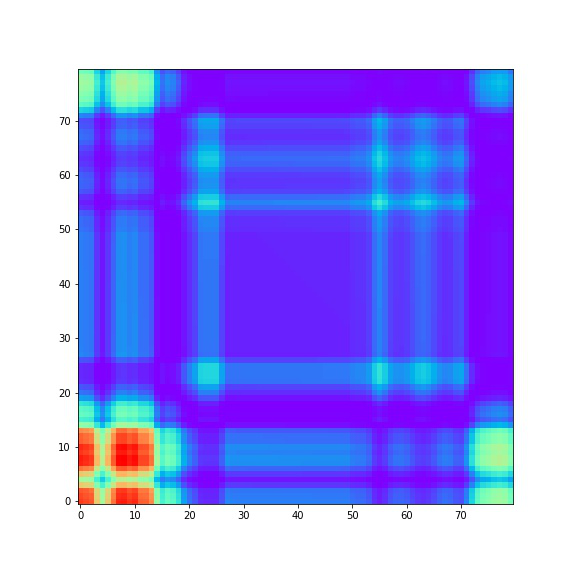

In [17]:
from PIL import Image               # to load images
from IPython.display import display # to display images

pil_im = Image.open('GASF/'+specific_GASF)
display(pil_im)